In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
stars = pd.read_csv('data/stars.csv').dropna()

star_name = stars.name
star_temperature = stars.temperature

stars = stars.drop(columns=['name','spectraltype', 'temperature'])

In [31]:
stars.shape

(518, 9)

In [32]:
stars = stars.dropna()
stars.shape

(518, 9)

In [33]:
stars.head()

,magJ,radius,magB,magV,magK,mass,metallicity,magH,planets
0,2.943,19.000,5.740,4.740,2.282,2.70,-0.350,2.484,1.0
1,2.876,24.080,6.415,5.024,1.939,1.80,0.040,2.091,1.0
2,3.019,11.000,6.240,5.220,2.331,2.20,-0.240,2.608,1.0
3,5.158,0.708,7.570,6.670,4.714,1.00,0.430,4.803,2.0
4,5.090,1.243,6.590,5.950,4.430,1.11,0.096,4.720,0.0


In [34]:
star_temperature.head()

0    4742.0
1    4340.0
2    4813.0
3    5311.0
4    5825.0
Name: temperature, dtype: float64

In [35]:
star_name.head()

0        11 Com
1        11 UMi
2        14 And
3        14 Her
4    16 Cygni A
Name: name, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
x = stars
y = star_temperature

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [38]:
lm = LinearRegression().fit(x_train, y_train)

In [39]:
prediction = lm.predict(x_test)

In [40]:
np.corrcoef(y_test, prediction)

array([[1.      , 0.907767],
       [0.907767, 1.      ]])

In [42]:
lm.intercept_

6682.3346288095

In [43]:
[(col, coef) for col, coef in zip(x_train, lm.coef_)]

[('magJ', -844.0658137400326),
 ('radius', -3.1805582501791037),
 ('magB', -350.4527252984655),
 ('magV', -157.96948365825418),
 ('magK', 1401.5905437053727),
 ('mass', 201.8259854132049),
 ('metallicity', -12.269141790976438),
 ('magH', -12.108576248985145),
 ('planets', -28.962206586373185)]

In [44]:
lm.score(x_test,y_test)

0.8140667274603748

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0EAEA3B0>,
      dtype=object)

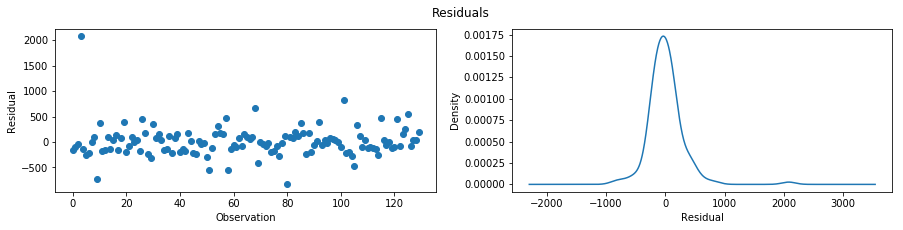

In [46]:
from ml_utils.regression import plot_residuals

plot_residuals(y_test, prediction)

In [47]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, prediction))

302.7424971371634